# Processing for data after Complete data, and NLP generated features
Feature Selection via Shapley Values
Training Decision Tree Classifier
Training Vanilla NN
Training Multiple experts systems

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 9.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=9eb2d8afe6544b1bc53d7e971652e3a5f2d3378acda30e2646aa420b1a744ca2
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('nlpGendata.csv')
# da=df.values
y=df['output']
X=df.drop('output', 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

shap.initjs()
xgb_model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001, random_state=0)
xgb_model.fit(X_train, y_train)


[11:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.001, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_predict = xgb_model.predict(X_test)
mean_squared_error(y_test, y_predict)**(0.5)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(X_train)
# print(shap_values)
# shap.plots.bar(shap_values)

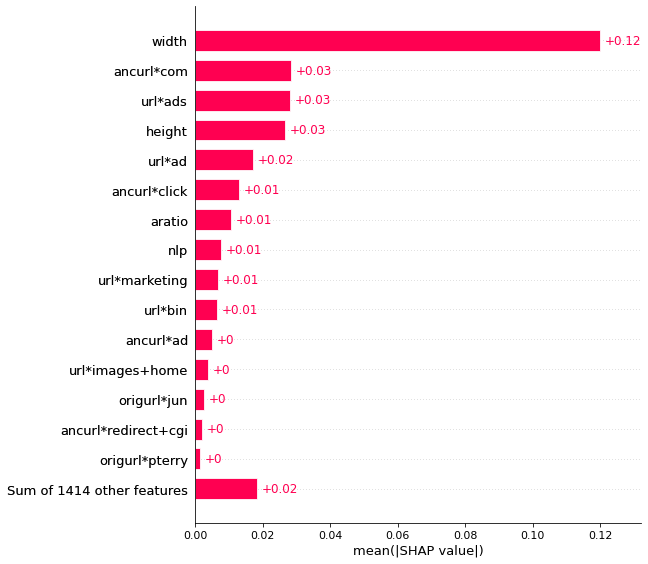

In [ ]:
shap.plots.bar(shap_values,max_display=16)

In [ ]:
#SELECTED COLUMNS.
# cols=['width','aratio','ancurl*com','url*ads','height','alt*click','ancurl*click','url*ad','alt*net','url*bin','url*images+home','ancurl*download','ancurl*keith+dumble','alt*to','output_nonad']
cols = ['width', 'ancurl*com', 'url*ads', 'height', 'url*ad', 'ancurl*click', 'aratio', 'nlp','url*marketing','url*bin','url*images+home', 'origurl*jun', 'output']

dataf=df[cols]
dataf.head()

,width,ancurl*com,url*ads,height,url*ad,ancurl*click,aratio,nlp,url*marketing,url*bin,url*images+home,origurl*jun,output
0,0.375911,1.0,0.0,0.231385,1.0,0.0,0.050007,0.438357,0.0,0.0,0.0,0.0,0.0
1,0.791566,1.0,0.0,0.129897,1.0,0.0,0.166108,0.103473,0.0,0.0,0.0,0.0,0.0
2,0.503152,0.0,0.0,0.094078,0.0,0.0,0.146127,0.128074,0.0,0.0,0.0,0.0,0.0
3,0.791566,0.0,0.0,0.134375,0.0,0.0,0.159498,0.413829,0.0,0.0,0.0,0.0,0.0
4,0.791566,0.0,0.0,0.134375,0.0,0.0,0.159498,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataf.to_csv('Shap_data_nlp.csv',index=False)

In [ ]:
#TRAIN MODELS.
print(len(cols))

13


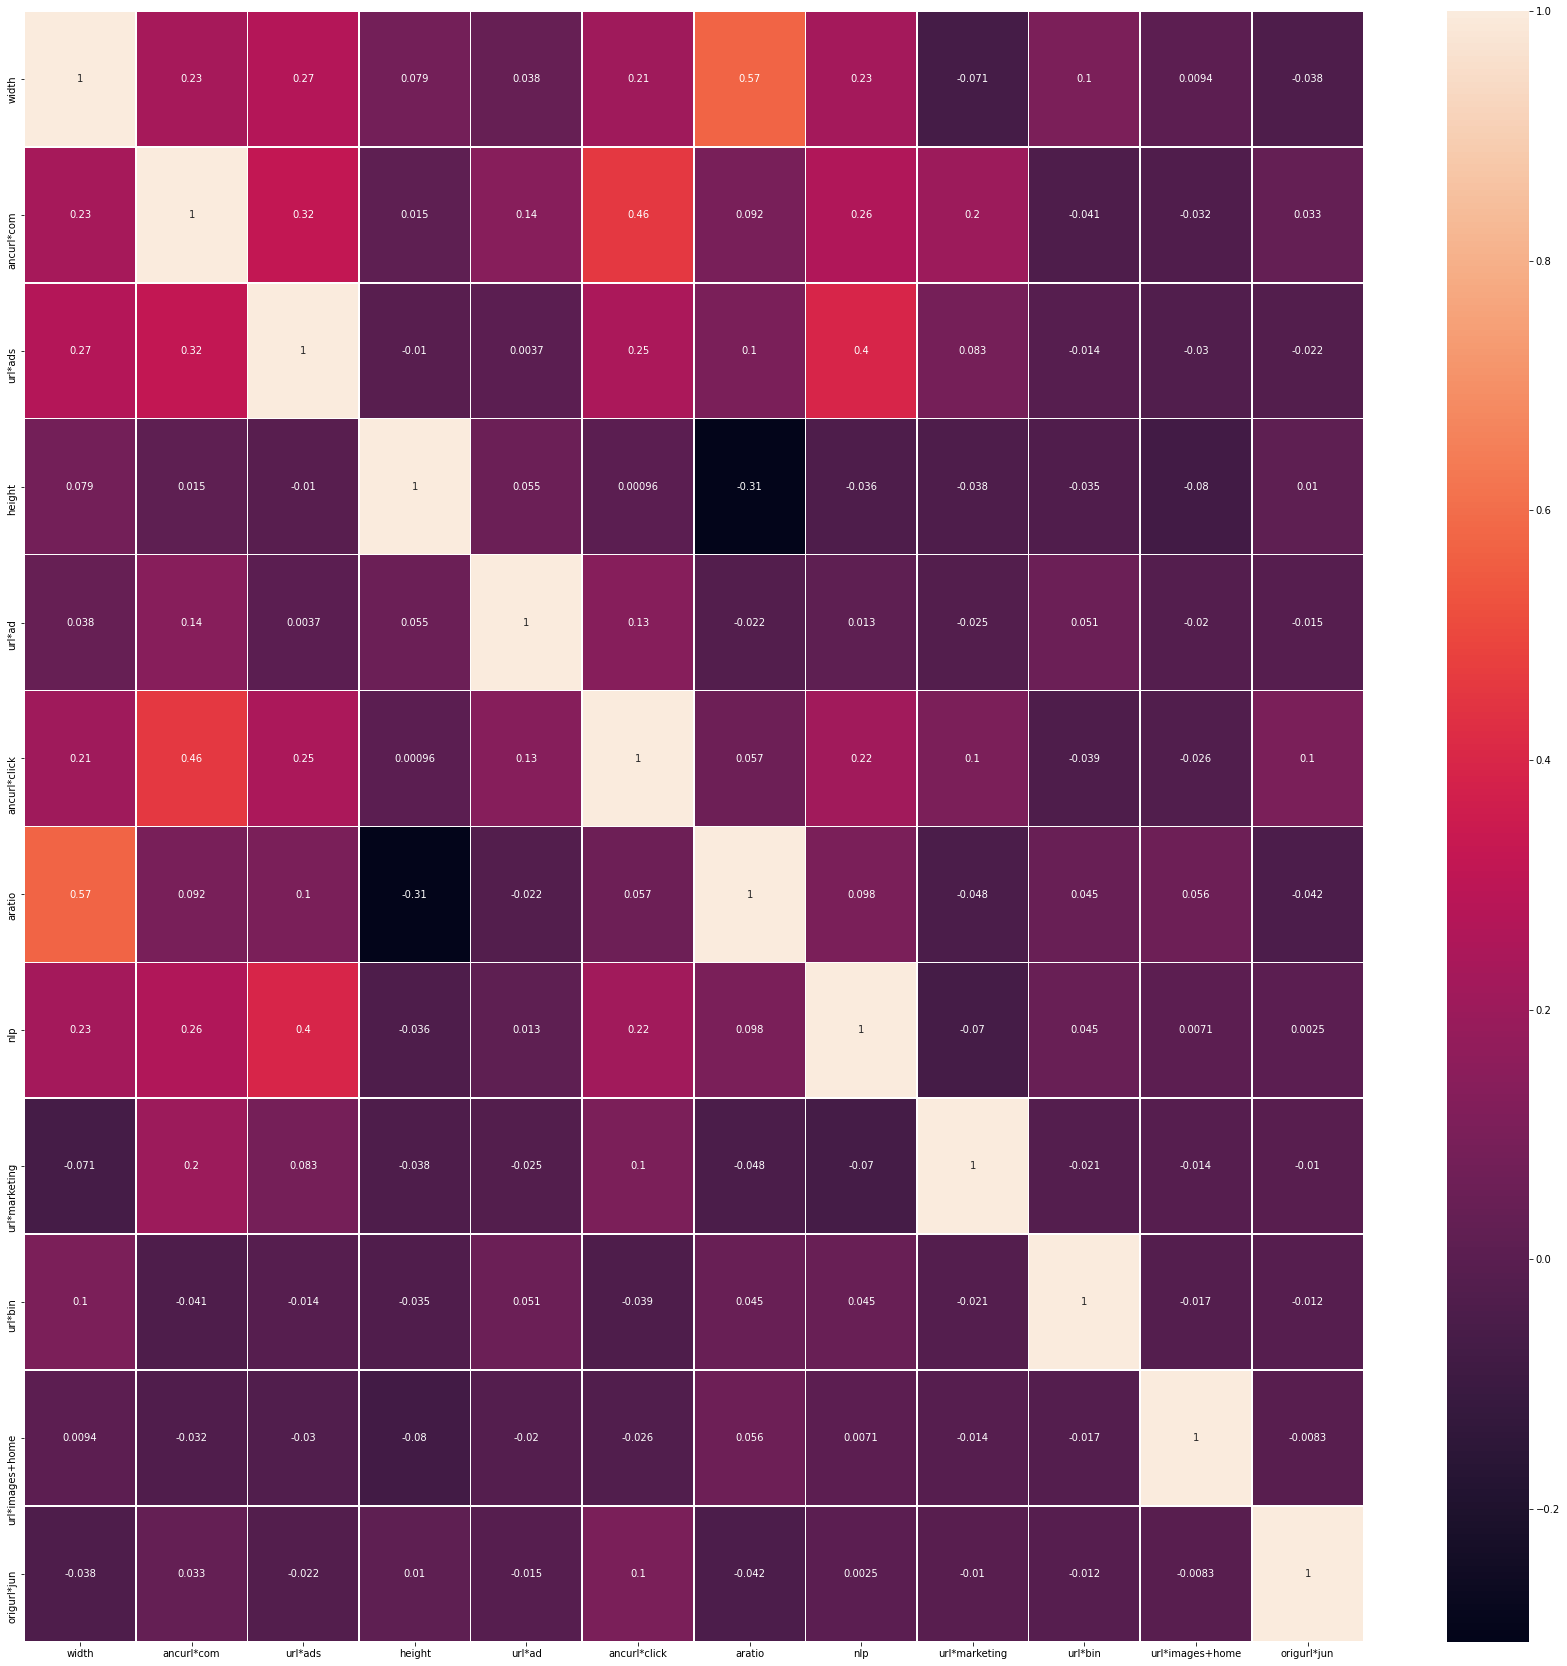

In [ ]:
columns_for_visualization = list()
for i in range(12):
  columns_for_visualization.append(cols[i])

corr=df[columns_for_visualization].corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr,annot=True,linewidths=.5, ax=ax)

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
da=df.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)

In [ ]:
cap_da = df.values
X=da[:,:-1]
y=da[:,-1]


xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=80)

In [ ]:
def fit_models(classifiers,xtrain,ytrain):
    """This function fit multiple models by sklearn and return the dictionary with values as  objects of models"""
    models=collections.OrderedDict()
    for constructor in classifiers:
        obj=constructor()
        obj.fit(xtrain,ytrain)
        models[str(constructor).split(':')[0]]=obj
    return models

def classification_multi_report(ytest,models_array):
    """This function generate classification accuracy report for given input model objects"""
    for i in models_array:
        print('__________________________________________________')
        print('the model - '+str(i))
        print(classification_report(ytest,models_array[i].predict(xtest)))
def cross_Function(models,cv):
    """This function return cross validated accuray and the variance of given input model obejects"""
    accuracy={}
    for model in models:
        cross_val_array=cross_val_score(models[model],xtrain,ytrain,scoring='accuracy',cv=cv)
        accuracy[model]=[np.mean(cross_val_array),np.std(cross_val_array)]
    return accuracy

def multi_grid_search(param_grid_array,estimator_list,x,y):
    """This function calculate the grid search parameters and accuracy  for given input modles and return dictionary with each tupple containing accuracy and best parameters"""
    d={}
    count=0
    for i in estimator_list:
        gc=GridSearchCV(estimator=estimator_list[i],param_grid=param_grid_array[count],scoring ='accuracy',cv=5).fit(x,y)
        d[i]=(gc.best_params_,gc.best_score_)
        count+=1
    return d

In [ ]:
# classifiers=[DecisionTreeClassifier]
classifiers=[SVC, KNeighborsClassifier, RandomForestClassifier, XGBClassifier, LogisticRegression, DecisionTreeClassifier]

model_list=fit_models(classifiers,xtrain,ytrain)

classification_multi_report(ytest,model_list)

__________________________________________________
the model - <class 'sklearn.svm._classes.SVC'>
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       409
         1.0       0.97      0.98      0.97       824

    accuracy                           0.97      1233
   macro avg       0.97      0.96      0.96      1233
weighted avg       0.97      0.97      0.97      1233

__________________________________________________
the model - <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       409
         1.0       0.98      0.97      0.98       824

    accuracy                           0.97      1233
   macro avg       0.96      0.97      0.97      1233
weighted avg       0.97      0.97      0.97      1233

__________________________________________________
the model - <class 'sklearn.ensemble._forest.RandomForestClassifier'>

In [ ]:
# K means cross validation

obj=cross_Function(model_list,cv=20)
for model in obj:
    print('the model -'+str(model)+'has \n || crosss validated accuracy as  -> '+str(obj[model][0])+' | variance - '+str(obj[model][1])+' ||' )
    print('______________________________________________________________________________________________________________')

the model -<class 'sklearn.svm._classes.SVC'>has 
 || crosss validated accuracy as  -> 0.9606764763014762 | variance - 0.017091988073086217 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.neighbors._classification.KNeighborsClassifier'>has 
 || crosss validated accuracy as  -> 0.9537150349650348 | variance - 0.013806298393399984 ||
______________________________________________________________________________________________________________
the model -<class 'sklearn.ensemble._forest.RandomForestClassifier'>has 
 || crosss validated accuracy as  -> 0.972503885003885 | variance - 0.012921056925826948 ||
______________________________________________________________________________________________________________
the model -<class 'xgboost.sklearn.XGBClassifier'>has 
 || crosss validated accuracy as  -> 0.9509324009324007 | variance - 0.014675795010398387 ||
______________________________________

In [ ]:
param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':np.arange(1,3),
        'p':[2]
        
    }
]

param_RandomForest = [
    {
        # 'n_estimators': np.arange(100, 500, 100)
        # 'max_depth' : [1, 3, 5, 7, 9, 10]
    }
]

param_XGB=[
    {
        # 'n_estimators' : np.arange(100, 500, 100)
    }
]

param_logit = [
  {
      
  }
]

param_XGBoost=[
    {
        # 'n_estimators': np.arange(100, 500, 100)
        # 'max_depth' : [3, 5]
    }
]

param_DTC = [
             {
                 
             }
]

# classifiers=[SVC, KNeighborsClassifier, RandomForestClassifier, XGBClassifier, LogisticRegression, DecisionTreeClassifier]
# classifiers = [RandomForestClassifier]
param_grid_array=[param_DTC]
multi_grid_search(param_grid_array,model_list,xtrain,ytrain)

{"<class 'sklearn.tree._classes.DecisionTreeClassifier'>": ({},
  0.9519806089986366)}

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

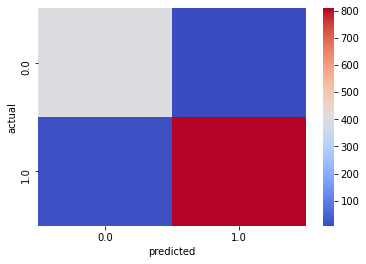

In [ ]:
sns.heatmap(pd.crosstab(ytest,classifier.predict(xtest)),cmap='coolwarm')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [ ]:
print(classification_report(ytest,classifier.predict(xtest)))


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       409
         1.0       0.99      0.98      0.99       824

    accuracy                           0.98      1233
   macro avg       0.98      0.98      0.98      1233
weighted avg       0.98      0.98      0.98      1233



In [5]:
#custom NN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam
import keras

In [ ]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.125, random_state=1)

In [ ]:
#model params
model=Sequential()

model.add(Dense(30, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))

model.add(Dense(18,activation='sigmoid'))

# model.add(Dense(5,activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30)                42900     
_________________________________________________________________
dense_17 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 43,451
Trainable params: 43,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy','AUC'])

# class_weights={0: 1,
#                 1:2.5,
#                 2: 5}
history = model.fit(X_train1, y_train1, batch_size=64, epochs=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/512
52/52 [==============================] - 1s 11ms/step - loss: 0.0235 - accuracy: 0.9915 - auc: 0.9996 - val_loss: 0.0264 - val_accuracy: 0.9903 - val_auc: 0.9997
Epoch 2/512
52/52 [==============================] - 0s 4ms/step - loss: 0.0232 - accuracy: 0.9919 - auc: 0.9996 - val_loss: 0.0203 - val_accuracy: 0.9927 - val_auc: 0.9997
Epoch 3/512
52/52 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.9904 - auc: 0.9995 - val_loss: 0.0206 - val_accuracy: 0.9927 - val_auc: 0.9997
Epoch 4/512
52/52 [==============================] - 0s 6ms/step - loss: 0.0215 - accuracy: 0.9925 - auc: 0.9996 - val_loss: 0.0206 - val_accuracy: 0.9927 - val_auc: 0.9997
Epoch 5/512
52/52 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.9949 - auc: 0.9998 - val_loss: 0.0222 - val_accuracy: 0.9927 - val_auc: 0.9997
Epoch 6/512
52/52 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9943 - auc: 0.9997 - val_loss: 0.0201 - 

In [ ]:
score = model.evaluate(X_test,y_test, verbose=1)
print(score)
print('Test accuracy:', score[1])

26/26 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9793 - auc: 0.9949
[0.08491522818803787, 0.9793187379837036, 0.9948849678039551]
Test accuracy: 0.9793187379837036


In [ ]:
model.save("shapNN3_nlp.h5")

model.save("shapNN1_nlp.h5")


26/26 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9745 - auc: 0.9923
[0.09011736512184143, 0.974452555179596, 0.9922560453414917]
Test accuracy: 0.974452555179596

2.

[50]
score = model.evaluate(X_test,y_test, verbose=1)
print(score)
print('Test accuracy:', score[1])
26/26 [==============================] - 0s 2ms/step - loss: 0.0809 - accuracy: 0.9793 - auc: 0.9927
[0.08087597042322159, 0.9793187379837036, 0.992664098739624]
Test accuracy: 0.9793187379837036
52/52 [==============================] - 0s 6ms/step - loss: 0.0290 - accuracy: 0.9895 - auc: 0.9994 - val_loss: 0.0282 - val_accuracy: 0.9878 - val_auc: 0.9995


---
26/26 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9805 - auc: 0.9967
[0.0649651363492012, 0.9805352687835693, 0.996745228767395]
Test accuracy: 0.9805352687835693

52/52 [==============================] - 0s 5ms/step - loss: 0.0148 - accuracy: 0.9948 - auc: 0.9999 - val_loss: 0.0229 - val_accuracy: 0.9927 - val_auc: 0.9997




In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [18]:
prevModel=keras.models.load_model('shapNN3_nlp.h5')

In [19]:
prevModel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                42900     
_________________________________________________________________
dense_21 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 19        
Total params: 43,477
Trainable params: 43,477
Non-trainable params: 0
_________________________________________________________________
